## Overview of Human Activity Recognition

Human Activity Recognition (HAR) is a field of study in computer vision that aims to identify and classify human activities from data collected via sensors or cameras. It plays a pivotal role in a variety of applications across different sectors, such as healthcare, sports, surveillance, and human-computer interaction. HAR is primarily concerned with determining what activity a person is engaged in by analyzing various data modalities, including images, video frames, accelerometer data, and more.

### Problem Statement

In this project, we will be focusing on a vision-based approach to Human Activity Recognition. The task is to build an image classification model using Convolutional Neural Networks (CNN) to automatically classify 15 different human activities. These activities are captured in images and labeled accordingly.

The goal of this project is to train a model that can predict the correct activity label from a set of unseen images, essentially learning the patterns in human behavior and activity from images.

## Dataset Overview

The dataset we are using contains images of human activities from 15 different categories. Each image represents a human performing one activity, and these images are stored in respective folders.

Dataset Details:
- Number of Activities: 15 (e.g., ‘calling’, ‘clapping’, ‘dancing’, ‘eating’, etc.)
- Total Images: 12,000+ labeled images for training.
- Test Set: 5400 images for testing the trained model.
- Images per Category: Each activity is represented by a separate folder containing images of that particular activity.
- Data Files:
    - train: Contains images of each activity (15 classes).
    - test: Contains test images for prediction.
    - Training_set.csv: Provides the image filenames and labels for training.
    - Testing_set.csv: Provides the image filenames for prediction.
    - sample_submission.csv: A template for submission that contains the predicted activity for each test image.

Here’s the dataset breakdown:

- Training Data: Images labeled into 15 different activity classes.
- Testing Data: Images for which we need to make predictions.

In [79]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.utils import load_img

# Path for the files
train_file_path = './Training_set.csv'
test_file_path = './Testing_set.csv'

# Load the training and testing datasets from CSV files
train_df = pd.read_csv(train_file_path)
test_df = pd.read_csv(test_file_path)

# Display the first few rows of both the training and testing datasets to understand their structure
print("Training Set Preview:")
print(train_df.head())

print("\nTesting Set Preview:")
print(test_df.head())

Training Set Preview:
      filename         label
0  Image_1.jpg       sitting
1  Image_2.jpg  using_laptop
2  Image_3.jpg       hugging
3  Image_4.jpg      sleeping
4  Image_5.jpg  using_laptop

Testing Set Preview:
      filename
0  Image_1.jpg
1  Image_2.jpg
2  Image_3.jpg
3  Image_4.jpg
4  Image_5.jpg


In [80]:
train_data.shape, test_data.shape

((12600, 2), (5400, 1))

In [81]:
# Check for missing data in the training and testing datasets
print("Training Set Missing Values:")
print(train_data.isnull().sum())

print("\nTesting Set Missing Values:")
print(test_data.isnull().sum())

Training Set Missing Values:
filename    0
label       0
dtype: int64

Testing Set Missing Values:
filename    0
dtype: int64


## Exploratory Data Analysis (EDA)

In [82]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12600 entries, 0 to 12599
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  12600 non-null  object
 1   label     12600 non-null  object
dtypes: object(2)
memory usage: 197.0+ KB


In [83]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5400 entries, 0 to 5399
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  5400 non-null   object
dtypes: object(1)
memory usage: 42.3+ KB


In [84]:
# Unique labels in the training dataset
unique_labels = train_df['label'].unique()
unique_labels

array(['sitting', 'using_laptop', 'hugging', 'sleeping', 'drinking',
       'clapping', 'dancing', 'cycling', 'calling', 'laughing', 'eating',
       'fighting', 'listening_to_music', 'running', 'texting'],
      dtype=object)

In [85]:
train_df['label'].value_counts()

label
sitting               840
using_laptop          840
hugging               840
sleeping              840
drinking              840
clapping              840
dancing               840
cycling               840
calling               840
laughing              840
eating                840
fighting              840
listening_to_music    840
running               840
texting               840
Name: count, dtype: int64

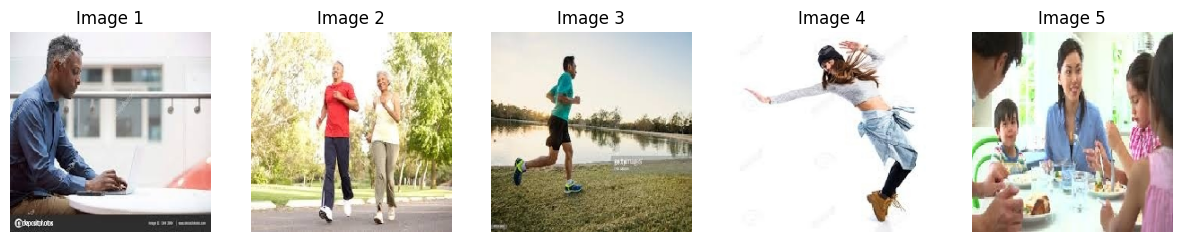

In [86]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img

# Define the paths for your extracted dataset
train_img_dir = './train/'
test_img_dir = './test/'

# Function to load and display a sample of images
def display_sample_images(img_dir, num_samples=5):
    # Get a list of image files in the directory
    img_files = os.listdir(img_dir)

    # Select the first 'num_samples' images to display
    sample_files = img_files[:num_samples]

    # Create a plot for displaying images
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))

    for i, img_file in enumerate(sample_files):
        img_path = os.path.join(img_dir, img_file)  # Get the image path
        img = load_img(img_path, target_size=(224, 224))  # Load and resize the image

        # Display the image
        axes[i].imshow(img)
        axes[i].axis('off')  # Hide axis
        axes[i].set_title(f"Image {i+1}")

    plt.show()

# Display 5 sample images from the training dataset
display_sample_images(train_img_dir, num_samples=5)

Index(['filename', 'label'], dtype='object')


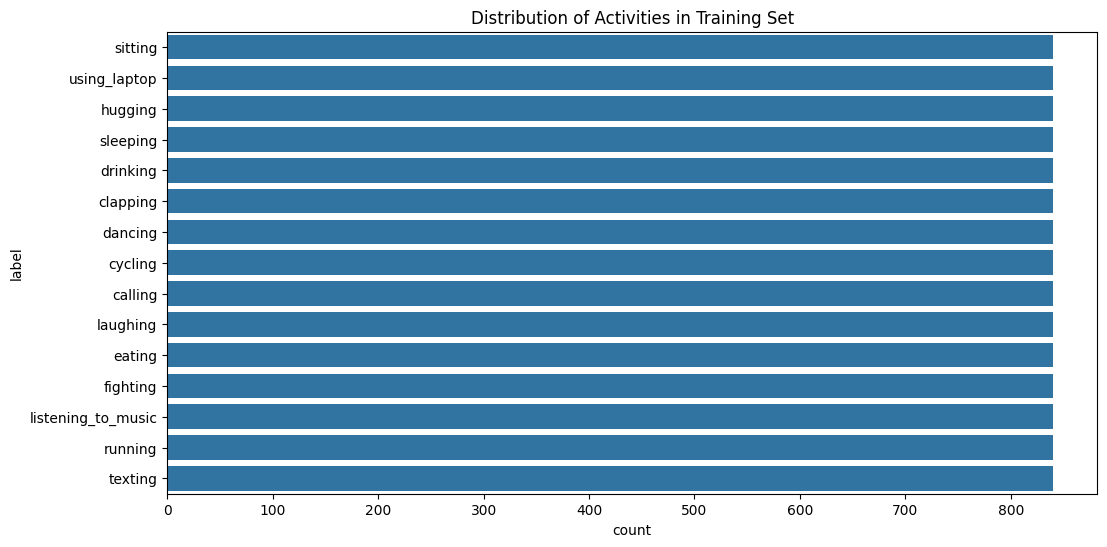

In [87]:
# Visualize the distribution of activity labels in the training dataset
import matplotlib.pyplot as plt
import seaborn as sns

# Check the column names in your DataFrame
print(train_df.columns)
plt.figure(figsize=(12,6))
sns.countplot(y='label', data=train_df)
plt.title("Distribution of Activities in Training Set")
plt.show()

#### Color Histograms (RGB or HSV)
Color histograms capture the distribution of colors in an image, which can be useful for classification tasks, particularly when color plays a significant role in the object detection

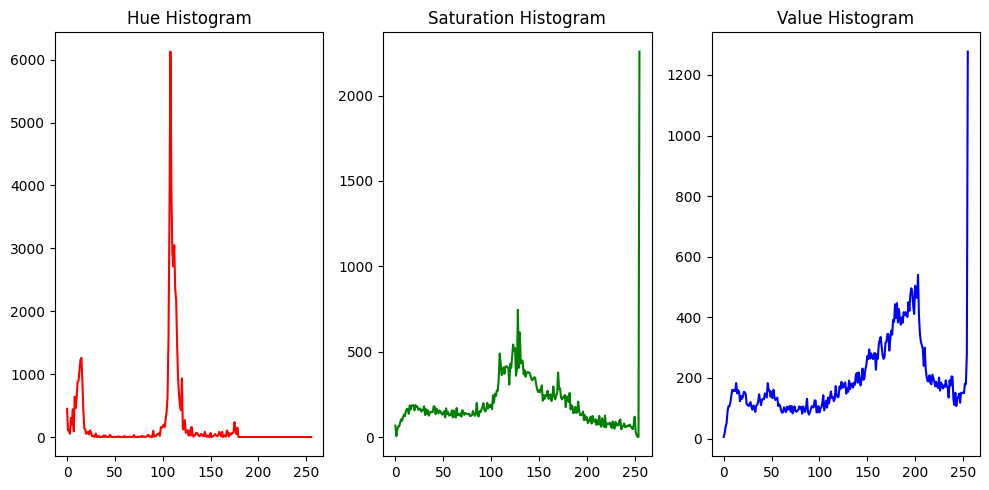

In [90]:
# Color Histograms (HSV) of a single image
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import img_to_array, load_img

# Load and preprocess the image
img_path = './train/Image_1.jpg'  # Modify as per your path
img = load_img(img_path, target_size=(224, 224))  # Resize the image
x = img_to_array(img)  # Convert to numpy array

# Convert image to HSV
img_hsv = cv2.cvtColor(x.astype(np.uint8), cv2.COLOR_BGR2HSV)

# Calculate histograms for each channel in HSV
hist_hue = cv2.calcHist([img_hsv], [0], None, [256], [0, 256])
hist_saturation = cv2.calcHist([img_hsv], [1], None, [256], [0, 256])
hist_value = cv2.calcHist([img_hsv], [2], None, [256], [0, 256])

# Plot the histograms
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.plot(hist_hue, color='red')
plt.title('Hue Histogram')

plt.subplot(1, 3, 2)
plt.plot(hist_saturation, color='green')
plt.title('Saturation Histogram')

plt.subplot(1, 3, 3)
plt.plot(hist_value, color='blue')
plt.title('Value Histogram')

plt.tight_layout()
plt.show()

## Preprocessing

#### Label Encoding

Since the training set has activity labels (e.g., "sitting", "using_laptop"), we need to encode these labels into numerical format (since models work better with numbers than with strings). We will use LabelEncoder to convert these string labels into numeric values.

Here's the code for encoding the labels:

In [34]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode the labels for the training set
train_df['encoded_label'] = label_encoder.fit_transform(train_df['label'])

# Display the encoded labels for the training set
print("Training Set with Encoded Labels:")
print(train_df[['filename', 'label', 'encoded_label']].head())

Training Set with Encoded Labels:
      filename         label  encoded_label
0  Image_1.jpg       sitting             11
1  Image_2.jpg  using_laptop             14
2  Image_3.jpg       hugging              7
3  Image_4.jpg      sleeping             12
4  Image_5.jpg  using_laptop             14


#### Resizing
Images come in various sizes, but models like VGG16 expect a fixed input size. We resize all images to a consistent size (e.g., 224x224 pixels), ensuring uniformity across the dataset and compatibility with the model input.

#### Normalization
Neural networks work best when the input features are normalized, i.e., scaled to a common range. Since the pixel values of images are usually between 0 and 255, normalizing them to a range of [0, 1] ensures that the network trains efficiently.

#### Data Augmentation 
Augmentation techniques allow us to artificially expand the dataset by creating different versions of the original images. This helps the model generalize better and avoid overfitting. The following augmentations are applied to the training images:

 - Rotation: The images are randomly rotated by up to 30 degrees. This helps the model learn the invariant features of the images, regardless of their orientation.

 - Width and Height Shifts: Randomly shifting images horizontally and vertically by up to 20% of the image size helps the model learn to recognize objects at different positions in the frame.

 - Shear Transformation: A small shear transformation (20%) is applied to stretch or squish the image along an axis. This simulates a change in perspective and helps the model recognize objects from different angles.

 - Zooming: Random zooming in or out by up to 20% forces the model to focus on objects of different sizes, improving its ability to handle variations in scale.

 - Horizontal Flip: The images are randomly flipped horizontally, which helps the model generalize better, especially in scenarios where the orientation of the subject doesn't matter (e.g., for human activity recognition, where the left and right sides are often interchangeable).

 - Fill Mode: When transformations like rotation or shifting occur, there may be missing pixels in the image. We use fill_mode='nearest' to fill these empty pixels with the nearest value.

#### Data Generation
After setting up data augmentation for the training set, we use Keras' ImageDataGenerator to load and preprocess images in batches. This allows for efficient data loading during model training. We separate the handling of the training and validation sets, as follows:

1. Training Generator (train_datagen):

- The training images are fed into the model in batches, with real-time augmentation applied on the fly. This helps the model to never see the exact same image twice during training, improving its generalization.
- We also normalize the pixel values to [0, 1] by using rescale=1./255.

2. Validation Generator (valid_datagen):

- For validation, no augmentation is performed (since we want to evaluate the model on untouched data). The validation images are only rescaled to normalize the pixel values.
- This ensures the validation set remains consistent and gives us a true representation of the model's performance on unseen data.

In [35]:
# Resizing , Normalization, Data augmentation, Data generation

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Initialize the ImageDataGenerator for training and validation
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Normalize pixel values to [0, 1]
    rotation_range=30,  # Randomly rotate images
    width_shift_range=0.2,  # Randomly shift images horizontally
    height_shift_range=0.2,  # Randomly shift images vertically
    shear_range=0.2,  # Shear transformation
    zoom_range=0.2,  # Randomly zoom in/out images
    horizontal_flip=True,  # Randomly flip images horizontally
    fill_mode='nearest'  # Fill missing pixels with the nearest value
)

# For validation, we just need normalization without augmentation
valid_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Generate batches of images and labels for training
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,  # Using the train dataframe
    directory='/train',  # Path to images
    x_col='filename',  # Column with image filenames
    y_col='label',  # Column with image labels
    target_size=(224, 224),  # Resize images to match model input
    batch_size=32,  # Batch size
    class_mode='categorical'  # Multi-class classification
)

# Generate batches of images and labels for validation
valid_generator = valid_datagen.flow_from_dataframe(
    dataframe=test_df,  # Using the test dataframe
    directory='/test',  # Path to images
    x_col='filename',  # Column with image filenames
    y_col=None,  # No labels for test se
    target_size=(224, 224),  # Resize images to match model input
    batch_size=32,  # Batch size
    class_mode=None,  # No labels for test set
    shuffle=False  # Don't shuffle test set to ensure order
)


Found 0 validated image filenames belonging to 0 classes.
Found 0 validated image filenames.


/Users/suraj/dev/Data_Science/projects/HumanActivityRecognition/venv/lib/python3.12/site-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 12600 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(
/Users/suraj/dev/Data_Science/projects/HumanActivityRecognition/venv/lib/python3.12/site-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 5400 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


##### Preprocessing example for a single image

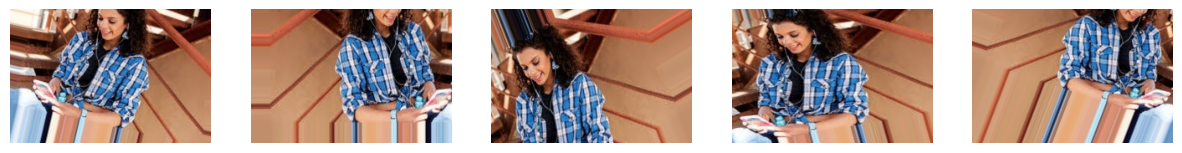

In [37]:
## Preprocessing example for a single image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import img_to_array, load_img

# Initialize ImageDataGenerator for data augmentation and normalization
datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Normalize pixel values to [0, 1]
    rotation_range=30,  # Randomly rotate images
    width_shift_range=0.2,  # Randomly shift images horizontally
    height_shift_range=0.2,  # Randomly shift images vertically
    shear_range=0.2,  # Shear transformation
    zoom_range=0.2,  # Randomly zoom in/out images
    horizontal_flip=True,  # Randomly flip images horizontally
    fill_mode='nearest'  # Fill missing pixels with the nearest value
)

# Example of loading and augmenting a single image
img_path = './train/Image_1.jpg'  # Modify as per your path
img = load_img(img_path)  # Load image
x = img_to_array(img)  # Convert to numpy array
x = np.expand_dims(x, axis=0)  # Expand dimensions to match model input

# Apply the data augmentation generator to the image
augmented_images = datagen.flow(x, batch_size=1)

# Display the augmented image
fig, ax = plt.subplots(1, 5, figsize=(15, 5))
for i in range(5):
    # Use __next__() instead of next() to get the next batch of augmented images
    augmented_image = augmented_images.__next__()[0]  # Get the augmented image
    ax[i].imshow(augmented_image)  # Display the image
    ax[i].axis('off')
plt.show()

## Feature Engineering

#### Histogram Equalization
This technique enhances the contrast of an image by spreading out the most frequent intensity values.

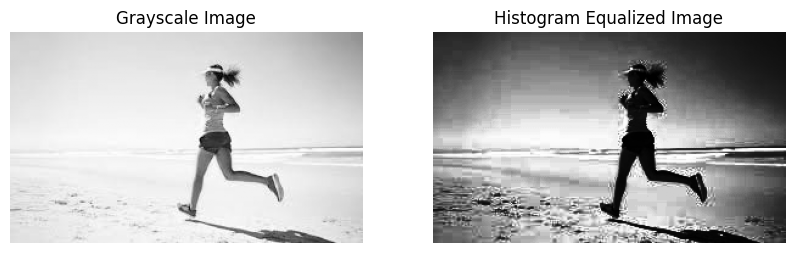

In [49]:
# Histogram Equalization for a single image

import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import img_to_array, load_img

# Load and preprocess the image
img_path = './train/Image_50.jpg'  # Modify as per your path
img = load_img(img_path)  # Load image
x = img_to_array(img)  # Convert to numpy array
img_gray = cv2.cvtColor(x.astype(np.uint8), cv2.COLOR_BGR2GRAY)  # Convert to grayscale

# Apply histogram equalization
img_equalized = cv2.equalizeHist(img_gray)  # Histogram Equalization

# Visualization of the original and equalized image
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(img_gray, cmap='gray')  # Grayscale Image
ax[0].set_title("Grayscale Image")
ax[0].axis('off')

ax[1].imshow(img_equalized, cmap='gray')  # Histogram Equalized Image
ax[1].set_title("Histogram Equalized Image")
ax[1].axis('off')

plt.show()

#### Color Space Transformation (HSV)
Converting the image to the HSV color space allows the model to focus on hue, saturation, and value separately.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


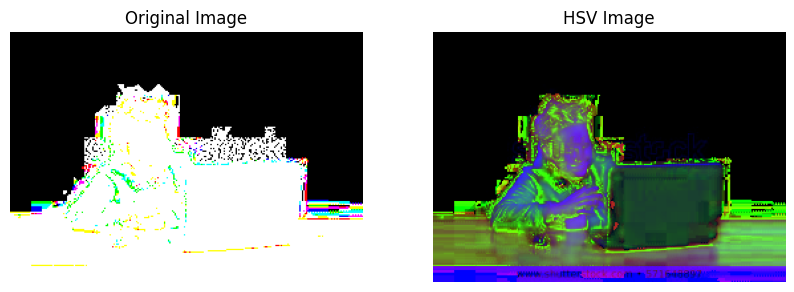

In [66]:
# HSV Color Space Transformation for a single image
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import img_to_array, load_img

# Load and preprocess the image
img_path = './train/Image_20.jpg'  # Modify as per your path
img = load_img(img_path)  # Load image
x = img_to_array(img)  # Convert to numpy array

# Convert image to HSV color space
img_hsv = cv2.cvtColor(x.astype(np.uint8), cv2.COLOR_BGR2HSV)  # Convert to HSV

# Visualization of the original and HSV image
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(x)  # Original Image
ax[0].set_title("Original Image")
ax[0].axis('off')

ax[1].imshow(img_hsv)  # HSV Image
ax[1].set_title("HSV Image")
ax[1].axis('off')

plt.show()

#### Histogram of Oriented Gradients (HOG) Features
HOG is a feature extraction technique that helps in detecting objects by capturing the gradient structure of the image. This can be useful for improving the model's ability to detect shapes and edges, which is important for object recognition tasks.
- It counts how often gradient directions (edges and orientations) occur in small regions of an image.

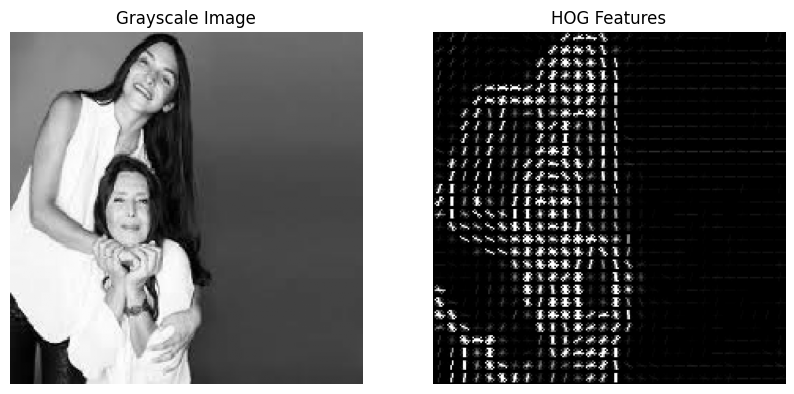

In [73]:
# HOG feature for a single image

from skimage.feature import hog
from skimage import exposure
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import img_to_array, load_img

# Load and preprocess the image
img_path = './train/Image_500.jpg'  # Modify as per your path
img = load_img(img_path, target_size=(224, 224))  # Resize the image
x = img_to_array(img)  # Convert to numpy array
img_gray = np.dot(x[...,:3], [0.2989, 0.587, 0.114])  # Convert to grayscale

# Extract HOG features and visualize
fd, hog_image = hog(img_gray, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)

# Rescale the HOG image for better visualization
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

# Visualization of the original and HOG image
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(img_gray, cmap='gray')  # Grayscale Image
ax[0].set_title("Grayscale Image")
ax[0].axis('off')

ax[1].imshow(hog_image_rescaled, cmap='gray')  # HOG Features
ax[1].set_title("HOG Features")
ax[1].axis('off')

plt.show()

#### Principal Component Analysis (PCA)
PCA is a technique for reducing the dimensionality of image data by finding the principal components that explain the most variance. This can speed up the training process and reduce overfitting by eliminating less important features.

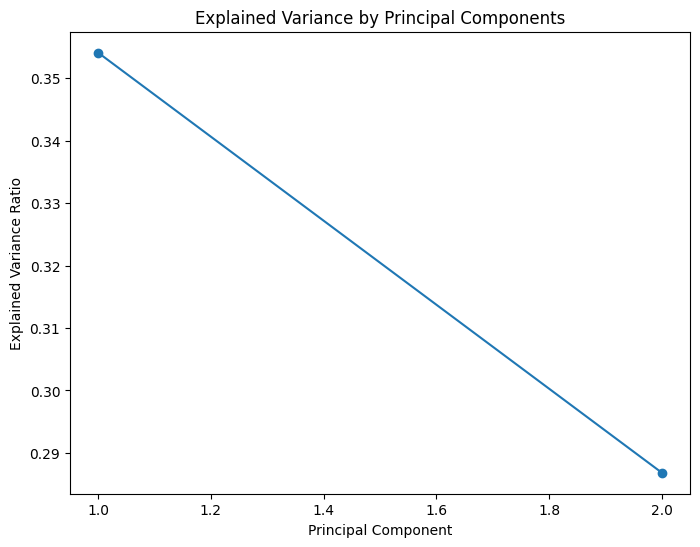

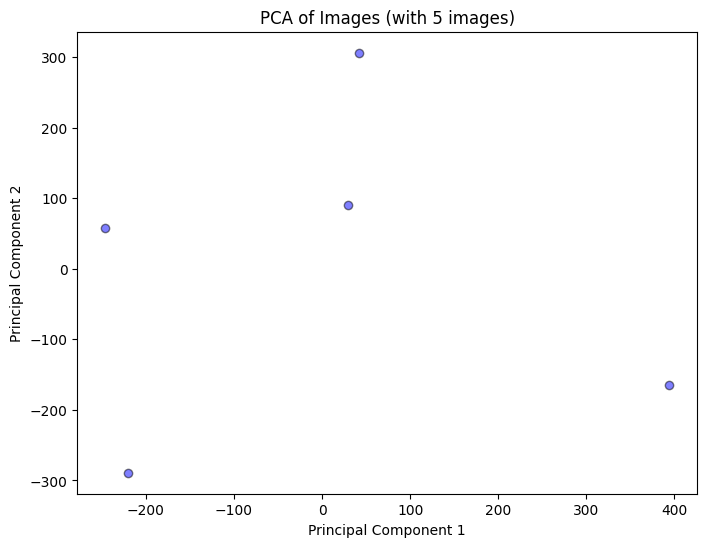

In [77]:
# PCA for 5 images
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import img_to_array, load_img
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Function to load a limited number of images
def load_images_from_directory(directory, target_size=(224, 224), num_images=5):
    images = []
    img_names = os.listdir(directory)[:num_images]  # Load only a limited number of images
    for img_name in img_names:
        img_path = os.path.join(directory, img_name)
        img = load_img(img_path, target_size=target_size)  # Resize the image
        img_array = img_to_array(img)  # Convert to numpy array
        images.append(img_array)
    return np.array(images)

# Directory where your images are located (adjust the path accordingly)
img_directory = './train/'

# Load only a small number of images (5 images)
images = load_images_from_directory(img_directory, num_images=5)

# Flatten the images (flatten each image into a 1D array)
images_flattened = images.reshape(images.shape[0], -1)

# Standardize the data (important for PCA)
scaler = StandardScaler()
images_scaled = scaler.fit_transform(images_flattened)

# Apply PCA for dimensionality reduction (reduce to 2 components for visualization)
pca = PCA(n_components=2)
images_pca = pca.fit_transform(images_scaled)

# Visualize the explained variance of each component
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.title("Explained Variance by Principal Components")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.show()

# Visualize the PCA results (scatter plot)
plt.figure(figsize=(8, 6))
plt.scatter(images_pca[:, 0], images_pca[:, 1], c='blue', edgecolors='k', alpha=0.5)
plt.title("PCA of Images (with 5 images)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

## Model Building

At this stage, we focus on training a deep learning model to recognize human actions effectively. Using the MobileNetV2 architecture as a pre-trained base model, we build a custom classification head to suit our dataset's unique requirements.

- The training data undergoes preprocessing and augmentation using ImageDataGenerator, a powerful tool that applies transformations such as rotation, scaling, and flipping to enhance the dataset's variability. These augmentations not only improve the model's generalization capabilities but also ensure that it can handle real-world variations in action images. The training pipeline is further optimized using callbacks like ModelCheckpoint, which saves the best-performing model, and EarlyStopping, which prevents overfitting by halting training when validation performance ceases to improve.

- By compiling the model with the Adam optimizer and a categorical crossentropy loss function, we ensure efficient convergence during training. Once trained, the model is evaluated on unseen test data to predict action classes, and these predictions are saved for further analysis. This phase highlights the practical application of deep learning techniques and transfer learning in building a scalable and efficient solution for human action recognition. The integration of these advanced methods demonstrates the power of combining state-of-the-art models with systematic training strategies to achieve accurate and reliable results.

In [98]:
import os
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping


# Define file paths for the CSV files
train_file_path = 'Training_set.csv'
test_file_path = 'Testing_set.csv'


# Define the paths for your extracted dataset
train_img_dir = 'train/'
test_img_dir = 'test/'


# Load the CSV files
try:
    train_labels_df = pd.read_csv(train_file_path)
    test_labels_df = pd.read_csv(test_file_path)
except FileNotFoundError as e:
    print(f"Error: Could not find CSV file. Please check path: {e.filename}")


# Update file paths in the CSV to point to the correct image directory
train_labels_df['filepath'] = train_labels_df['filename'].apply(lambda x: os.path.join(train_img_dir, x))
test_labels_df['filepath'] = test_labels_df['filename'].apply(lambda x: os.path.join(test_img_dir, x))
train_labels_df.head()



# Split data into training and validation sets
train_df, validation_df = train_test_split(
    train_labels_df,
    test_size=0.2,
    random_state=42,
    stratify=train_labels_df['label']
    )

# Reset indices after splitting
train_df = train_df.reset_index(drop=True)
validation_df = validation_df.reset_index(drop=True)

# Set image parameters
img_height = 224
img_width = 224
batch_size = 32



# Image Data Generators
# 1. Training Generator ( with data augmentation )
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

#2. Validation Generator ( without data augmentation, only normalization )
valid_datagen = ImageDataGenerator(
    rescale=1./255
)

# 1. Training Generator
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory='./', # Path to images , x_col will handle full path
    x_col='filepath',
    y_col='label',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',  # Multiple classes (human actions) , automatically performs one-hot encoding internally
    shuffle=True # Shuffle training data meaning, different batches each epoch
)

#2. Validation Generator
valid_generator = valid_datagen.flow_from_dataframe(
    dataframe=validation_df,
    directory='./', # Path to images , x_col will handle full path
    x_col='filepath',
    y_col='label',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',  # Multiple classes (human actions)
    shuffle=False # No need to shuffle validation data because we want to evaluate on the same order
)



# Get the number of classes
num_classes = len(train_generator.class_indices)
num_classes



# Model Construction
# Initialize MobileNetV2 as the base model for feature extraction
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(img_height, img_width, 3),
    include_top=False,
    weights='imagenet'
)

# Freeze the base model layers
base_model.trainable = False

# Build the final model with custom layers
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')  # Number of action classes
])

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Checkpoint and Early Stopping
checkpoint = ModelCheckpoint(
    'action_recognition_model.keras',
    save_best_only=True,
    monitor='val_loss',
    mode='min',
    verbose=1
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)



# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=valid_generator,
    callbacks=[checkpoint, early_stopping]
)

# Prepare test data (test_labels_df doesn't have labels)
test_datagen = ImageDataGenerator(rescale=1./255)



# Prediction on Test Set
# Create the test generator using the test DataFrame
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_labels_df,
    directory='./', # Path to images , x_col will handle full path
    x_col='filepath',
    y_col=None,  # No labels in the test data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode=None,  # No labels
    shuffle=False  # Don't shuffle for evaluation
)

# Predict the labels for the test images
predictions = model.predict(test_generator, verbose=1)

# Convert predictions to labels (argmax gives the index of the max probability)
class_labels = {v: k for k, v in train_generator.class_indices.items()}
predicted_indices = np.argmax(predictions,axis=1)
predicted_labels = [class_labels[idx] for idx in predicted_indices] # Map predictions to the actual labels



# Add predictions to the test dataframe
test_labels_df['predicted_label'] = predicted_labels

# Save the predictions to a CSV file
test_labels_df.to_csv('predictions.csv', index=False)

# Print the final dataframe with predictions
print("\nPredictions completed. Here are the first few rows of the predictions:")
print(test_labels_df.head())

Found 10080 validated image filenames belonging to 15 classes.
Found 2520 validated image filenames belonging to 15 classes.


/Users/suraj/dev/Data_Science/projects/HumanActivityRecognition/venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
315/315 ━━━━━━━━━━━━━━━━━━━━ 0s 861ms/step - accuracy: 0.3465 - loss: 2.1345
Epoch 1: val_loss improved from None to 1.26589, saving model to action_recognition_model.keras
315/315 ━━━━━━━━━━━━━━━━━━━━ 352s 1s/step - accuracy: 0.4203 - loss: 1.8193 - val_accuracy: 0.5905 - val_loss: 1.2659
Epoch 2/10
315/315 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4974 - loss: 1.5507
Epoch 2: val_loss improved from 1.26589 to 1.20624, saving model to action_recognition_model.keras
315/315 ━━━━━━━━━━━━━━━━━━━━ 410s 1s/step - accuracy: 0.5030 - loss: 1.5298 - val_accuracy: 0.6107 - val_loss: 1.2062
Epoch 3/10
315/315 ━━━━━━━━━━━━━━━━━━━━ 0s 876ms/step - accuracy: 0.5195 - loss: 1.4724
Epoch 3: val_loss improved from 1.20624 to 1.20129, saving model to action_recognition_model.keras
315/315 ━━━━━━━━━━━━━━━━━━━━ 344s 1s/step - accuracy: 0.5253 - loss: 1.4494 - val_accuracy: 0.6238 - val_loss: 1.2013
Epoch 4/10
315/315 ━━━━━━━━━━━━━━━━━━━━ 0s 926ms/step - accuracy: 0.5463 - loss: 1.4236
Epo

In [ ]:
# Save full model
model.save("action_recognition_model.keras")

In [101]:
# Save only model weights
model.save_weights("action_recognition.weights.h5")

## Conclusion

The completion of this project highlights the transformative potential of machine learning in the field of human action recognition. By leveraging efficient models, robust preprocessing techniques, and modern machine learning workflows, we successfully trained a system capable of accurately classifying human actions from images.

Through the integration of a user-friendly testing mechanism, the project enables real-world usability by predicting actions for unseen images. This feature demonstrates the model’s ability to generalize and adapt beyond the data it was trained on, which is a crucial benchmark for any industry-ready application.

#### Industry Relevance
This project provides a foundation for deploying AI-driven solutions in various domains:

1. Security and Surveillance: Automating activity monitoring in real-time to enhance safety.
2. Sports Analytics: Identifying and analyzing player movements to improve performance.
3. Healthcare: Assisting in physical therapy by tracking and evaluating patient actions.

#### Future Prospects

While this project lays a solid foundation, there are ample opportunities for improvement:

- Performance Enhancement: Fine-tuning the model with more diverse data and experimenting with advanced architectures like EfficientNet or Vision Transformers.
- Real-Time Deployment: Integrating the model into real-time systems using edge devices or cloud platforms.
- Explainability and Transparency: Adopting techniques like Grad-CAM for visualizing model decisions to increase trust in AI systems.